In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Configuration pour de meilleurs graphiques

In [9]:
plt.style.use('seaborn-v0_8-whitegrid')  
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

Chargement du dataset

file_path = 'C:/Users/Marouane/ImmoStat/valeursfoncieres-2024.txt'
df = pd.read_csv(file_path, sep="|", low_memory=False)

Affichage des premières lignes pour vérifier le chargement

In [18]:
print(f"Dimensions du dataset: {df.shape}")
df.head()

Dimensions du dataset: (3458643, 43)


,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2024,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,P,NaN,99.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,03/01/2024,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,115.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,08/01/2024,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,497.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2024,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2024,Vente,...,NaN,2,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN


Afficher toutes les colonnes disponibles

In [29]:
print(df.columns.tolist())

['Identifiant de document', 'Reference document', '1 Articles CGI', '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI', 'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere', 'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal', 'Commune', 'Code departement', 'Code commune', 'Prefixe de section', 'Section', 'No plan', 'No Volume', '1er lot', 'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot', '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot', 'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot', 'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local', 'Surface reelle bati', 'Nombre pieces principales', 'Nature culture', 'Nature culture speciale', 'Surface terrain']


Vérifier les types de données

In [32]:
print(df.dtypes)

Identifiant de document       float64
Reference document            float64
1 Articles CGI                float64
2 Articles CGI                float64
3 Articles CGI                float64
4 Articles CGI                float64
5 Articles CGI                float64
No disposition                  int64
Date mutation                  object
Nature mutation                object
Valeur fonciere                object
No voie                       float64
B/T/Q                          object
Type de voie                   object
Code voie                      object
Voie                           object
Code postal                   float64
Commune                        object
Code departement               object
Code commune                    int64
Prefixe de section            float64
Section                        object
No plan                         int64
No Volume                      object
1er lot                        object
Surface Carrez du 1er lot      object
2eme lot    

Vérifier les valeurs manquantes par colonne

In [34]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Nombre': missing_values, 'Pourcentage (%)': missing_percent})
print(missing_df[missing_df['Nombre'] > 0].sort_values('Pourcentage (%)', ascending=False))

                             Nombre  Pourcentage (%)
Identifiant de document     3458643       100.000000
Identifiant local           3458643       100.000000
1 Articles CGI              3458643       100.000000
2 Articles CGI              3458643       100.000000
3 Articles CGI              3458643       100.000000
4 Articles CGI              3458643       100.000000
5 Articles CGI              3458643       100.000000
Reference document          3458643       100.000000
Surface Carrez du 5eme lot  3457888        99.978171
Surface Carrez du 4eme lot  3456115        99.926908
5eme lot                    3451607        99.796568
No Volume                   3450646        99.768782
Surface Carrez du 3eme lot  3447639        99.681841
4eme lot                    3441269        99.497664
3eme lot                    3403307        98.400066
Surface Carrez du 2eme lot  3360146        97.152149
B/T/Q                       3308350        95.654567
Nature culture speciale     3302217        95.

Supprimer les colonnes avec 100% ou presque de valeurs manquantes

In [38]:
colonnes_a_supprimer = [
    'Identifiant de document', 'Identifiant local', '1 Articles CGI', '2 Articles CGI',
    '3 Articles CGI', '4 Articles CGI', '5 Articles CGI', 'Reference document',
    'Surface Carrez du 5eme lot', 'Surface Carrez du 4eme lot', '5eme lot', 'No Volume'
]
df_clean = df.drop(columns=colonnes_a_supprimer)

Convertir la colonne 'Valeur fonciere' en numérique

In [71]:
df_clean = df.copy()
df_clean['Valeur fonciere'] = df_clean['Valeur fonciere'].str.replace(',', '.').astype(float)

In [73]:
print(df_clean['Valeur fonciere'].dtype)
print(df_clean['Valeur fonciere'].head())

float64
0       346.5
1     10000.0
2    249000.0
3    329500.0
4    329500.0
Name: Valeur fonciere, dtype: float64


Création de sous-ensembles spécifiques

L'analyse par département

In [75]:
df_prix = df_clean.dropna(subset=['Valeur fonciere', 'Date mutation', 'Code departement', 'Commune'])

Calculer les statistiques par département

In [79]:
prix_par_departement = df_prix.groupby('Code departement')['Valeur fonciere'].agg(['mean', 'median', 'count'])
prix_par_departement = prix_par_departement.sort_values('mean', ascending=False)

print("Prix moyen par département (Top 10):")
print(prix_par_departement.head(10))

Prix moyen par département (Top 10):
                          mean    median  count
Code departement                               
93                1.050384e+07  350000.0  50264
92                3.879666e+06  449000.0  57543
75                3.759452e+06  470000.0  74176
13                3.032242e+06  270000.0  80692
974               2.722231e+06  262000.0  18750
94                1.939625e+06  330000.0  43902
95                1.761549e+06  252300.0  37545
83                1.684066e+06  285300.0  72785
91                1.466189e+06  232925.0  40847
77                1.197917e+06  219000.0  61340


Créer un sous-ensemble pour l'analyse des logements

In [86]:
df_logements = df_clean[df_clean['Type local'].isin(['Appartement', 'Maison'])].copy()

In [88]:
mask = (df_logements['Surface reelle bati'] > 0) & (df_logements['Valeur fonciere'] > 0)
df_logements.loc[mask, 'Prix au m2'] = df_logements.loc[mask, 'Valeur fonciere'] / df_logements.loc[mask, 'Surface reelle bati']

Analyse des prix au m² par département


Calculer le prix au m² moyen par département

In [96]:
if 'Prix au m2' not in df_logements_clean.columns:
    df_logements_clean['Prix au m2'] = df_logements_clean['Valeur fonciere'] / df_logements_clean['Surface reelle bati']

In [98]:
prix_m2_par_dept = df_logements_clean.groupby('Code departement')['Prix au m2'].agg(['mean', 'median', 'count'])
prix_m2_par_dept = prix_m2_par_dept.sort_values('mean', ascending=False)

print("Prix au m² moyen par département (Top 10):")
print(prix_m2_par_dept.head(10))

Prix au m² moyen par département (Top 10):
                          mean       median  count
Code departement                                  
93                15252.502030  4766.220930  16182
973               14905.963586  3389.830508   1293
75                12649.681270  9852.941176  29217
972               11626.076565  3317.073171   2385
92                10031.076149  6755.328798  17374
974                9886.058716  3095.238095   5881
94                 9691.353108  5269.230769  14312
06                 7348.141801  5059.347704  25776
83                 7260.654646  4297.474747  25993
77                 6776.756733  3156.182105  17738


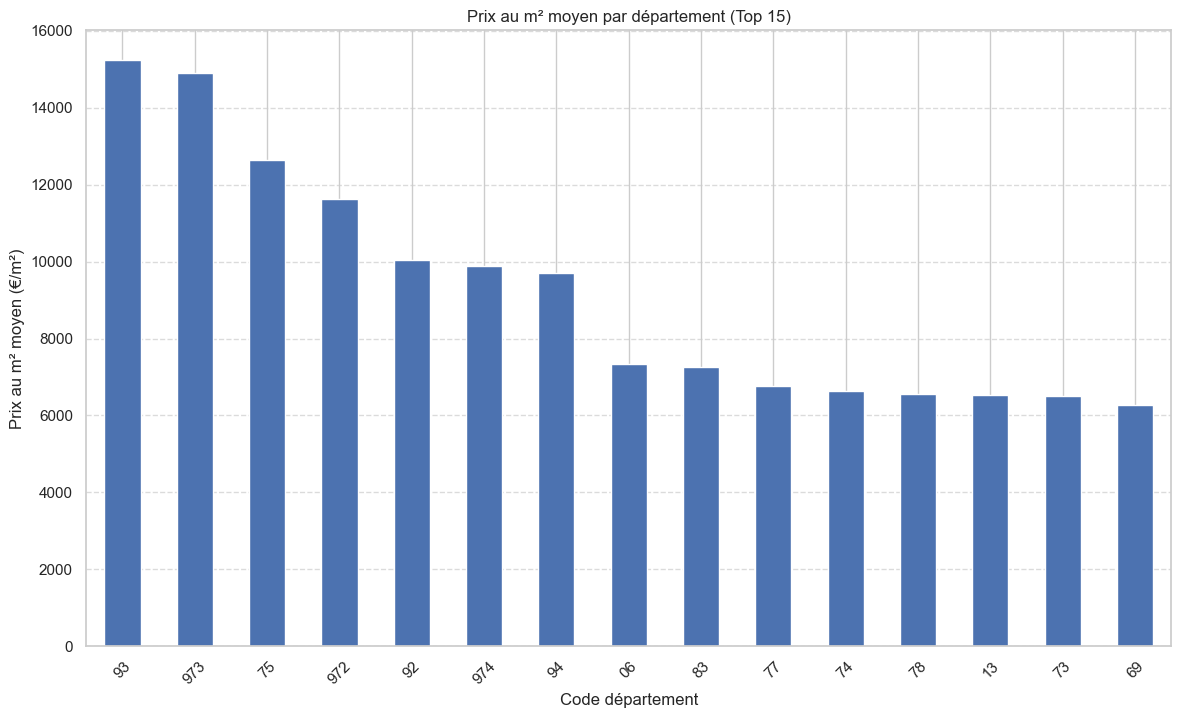

In [100]:
plt.figure(figsize=(14, 8))
prix_m2_par_dept.head(15)['mean'].plot(kind='bar')
plt.title('Prix au m² moyen par département (Top 15)')
plt.xlabel('Code département')
plt.ylabel('Prix au m² moyen (€/m²)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Analyse par type de bien

Prix moyen et prix au m² par type de bien

In [104]:
prix_par_type = df_logements_clean.groupby('Type local').agg({
    'Valeur fonciere': ['mean', 'median', 'count'],
    'Surface reelle bati': 'mean',
    'Prix au m2': 'mean'
})

In [106]:
prix_par_type.columns = ['_'.join(col).strip() for col in prix_par_type.columns.values]
print("Statistiques par type de bien:")
print(prix_par_type)

Statistiques par type de bien:
             Valeur fonciere_mean  Valeur fonciere_median  \
Type local                                                  
Appartement         370103.161202                180000.0   
Maison              298116.852440                208005.0   

             Valeur fonciere_count  Surface reelle bati_mean  Prix au m2_mean  
Type local                                                                     
Appartement                 420625                 56.063924      7086.182657  
Maison                      529034                101.827559      3088.245254  


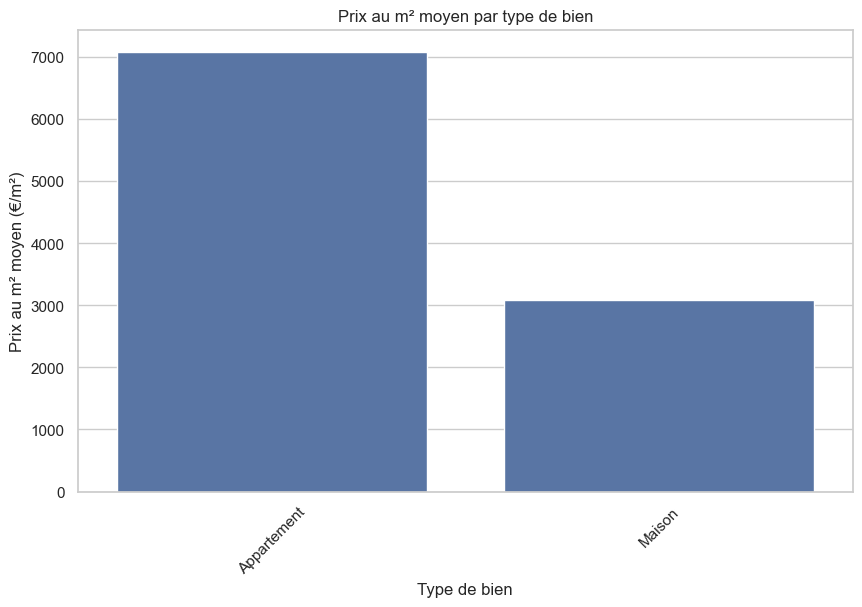

In [108]:
plt.figure(figsize=(10, 6))
sns.barplot(x=prix_par_type.index, y=prix_par_type['Prix au m2_mean'])
plt.title('Prix au m² moyen par type de bien')
plt.xlabel('Type de bien')
plt.ylabel('Prix au m² moyen (€/m²)')
plt.xticks(rotation=45)
plt.show()

Analyse temporelle

In [111]:
df_logements_clean['Date mutation'] = pd.to_datetime(df_logements_clean['Date mutation'])

In [113]:
df_logements_clean['Mois'] = df_logements_clean['Date mutation'].dt.to_period('M')

Évolution des prix dans le temps

In [116]:
evolution_prix = df_logements_clean.groupby('Mois').agg({
    'Valeur fonciere': 'mean',
    'Prix au m2': 'mean',
    'Type local': 'count'
})
evolution_prix.rename(columns={'Type local': 'Nombre_transactions'}, inplace=True)

Visualisation de l'évolution des prix

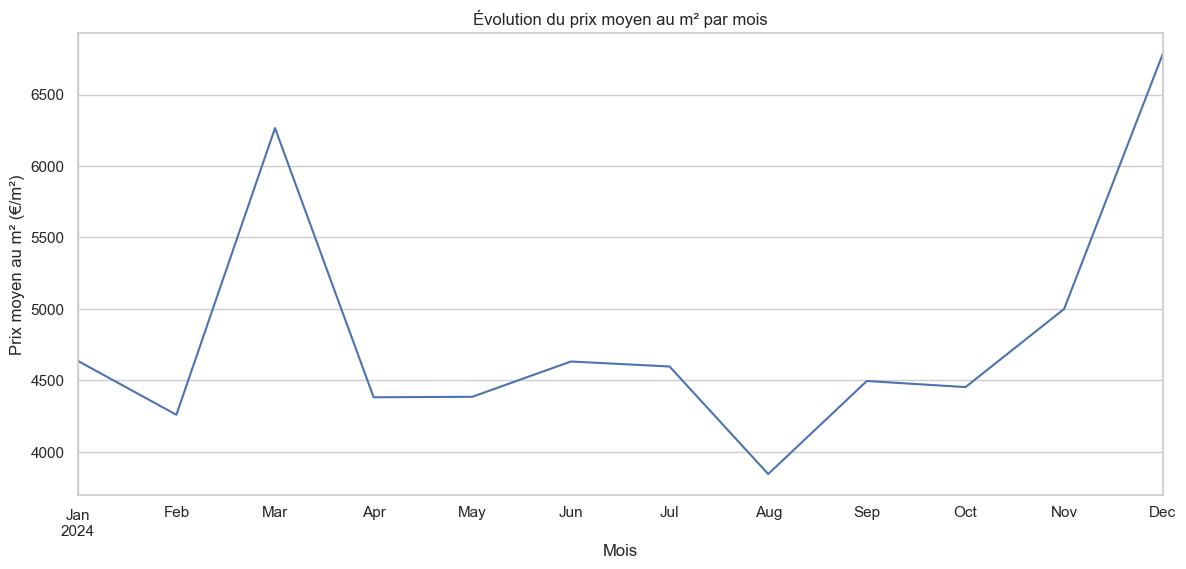

In [119]:
plt.figure(figsize=(14, 6))
evolution_prix['Prix au m2'].plot()
plt.title('Évolution du prix moyen au m² par mois')
plt.xlabel('Mois')
plt.ylabel('Prix moyen au m² (€/m²)')
plt.grid(True)
plt.show()

Analyse des communes les plus chères

On va Filtrer pour avoir au moins 30 transactions par commune

In [123]:
commune_prices = df_logements_clean.groupby(['Code departement', 'Commune']).agg({
    'Valeur fonciere': ['mean', 'count'],
    'Prix au m2': 'mean'
})

In [125]:
commune_prices.columns = ['_'.join(col).strip() for col in commune_prices.columns.values]
commune_prices = commune_prices[commune_prices['Valeur fonciere_count'] > 30]  # Au moins 30 transactions
commune_prices = commune_prices.sort_values('Prix au m2_mean', ascending=False)

print("Communes les plus chères (Top 20):")
print(commune_prices.head(20))

Communes les plus chères (Top 20):
                                        Valeur fonciere_mean  \
Code departement Commune                                       
78               PORT-MARLY (LE)                3.786628e+06   
76               GREGES                         4.432704e+06   
95               MAFFLIERS                      3.809421e+06   
973              MATOURY                        3.584241e+06   
42               MABLY                          3.581540e+06   
93               LE PRE-SAINT-GERVAIS           3.180591e+06   
77               CHAUMES-EN-BRIE                3.464738e+06   
93               BAGNOLET                       2.963504e+06   
12               ONET LE CHATEAU                9.033452e+05   
95               FREMAINVILLE                   3.015541e+06   
972              SAINT JOSEPH                   2.293923e+06   
95               BERNES-SUR-OISE                3.146722e+06   
77               CHAMPS-SUR-MARNE               3.234199e+06   
31   

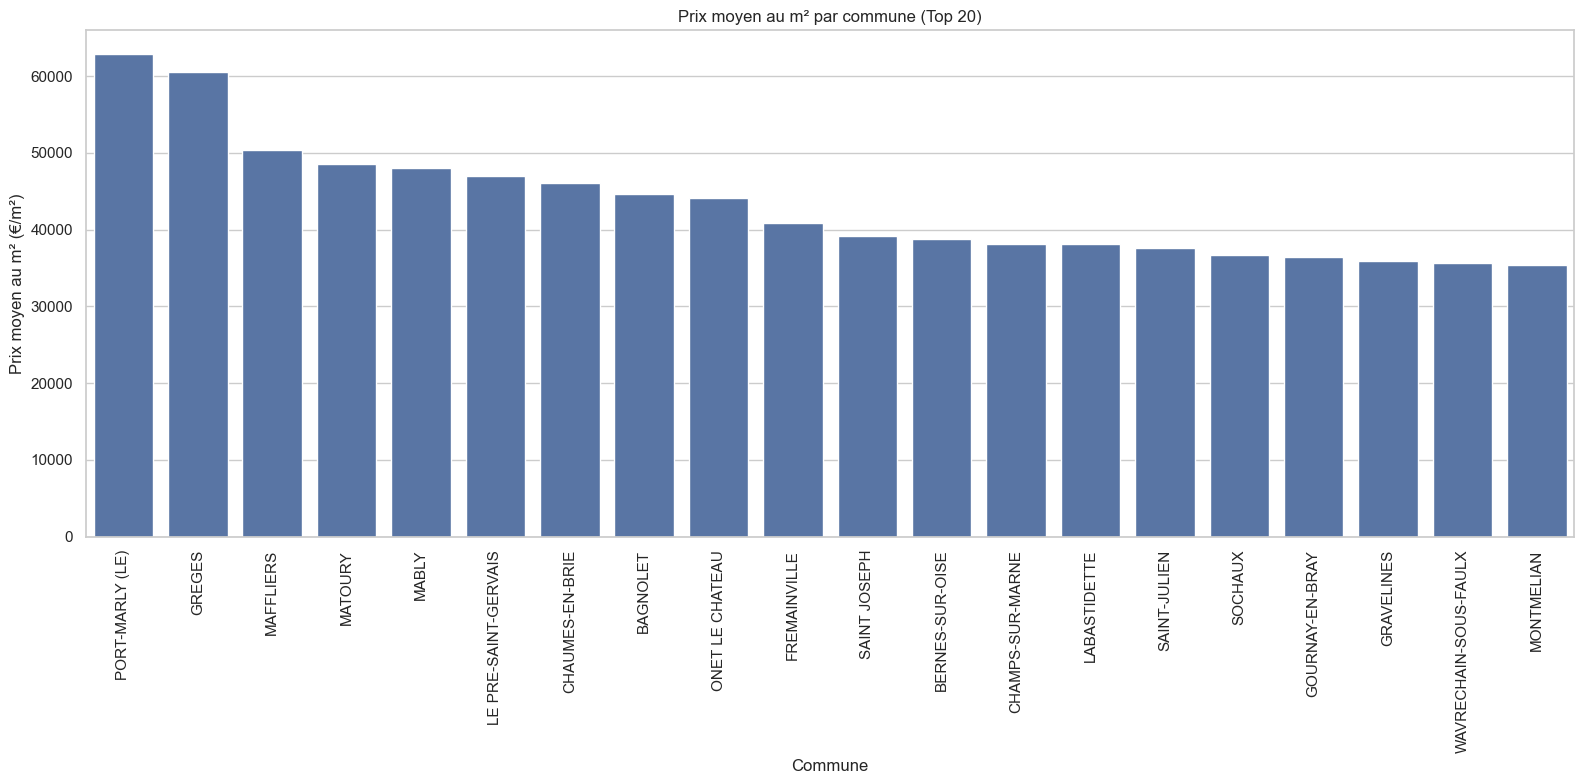

In [127]:
plt.figure(figsize=(16, 8))
top_communes = commune_prices.head(20).reset_index()
sns.barplot(x='Commune', y='Prix au m2_mean', data=top_communes)
plt.title('Prix moyen au m² par commune (Top 20)')
plt.xlabel('Commune')
plt.ylabel('Prix moyen au m² (€/m²)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Analyse des facteurs influençant le prix

On va Sélectionner les colonnes numériques pertinentes

In [133]:
colonnes_numeriques = ['Valeur fonciere', 'Surface reelle bati', 'Nombre pieces principales', 'Prix au m2']
df_num = df_logements_clean[colonnes_numeriques].copy()

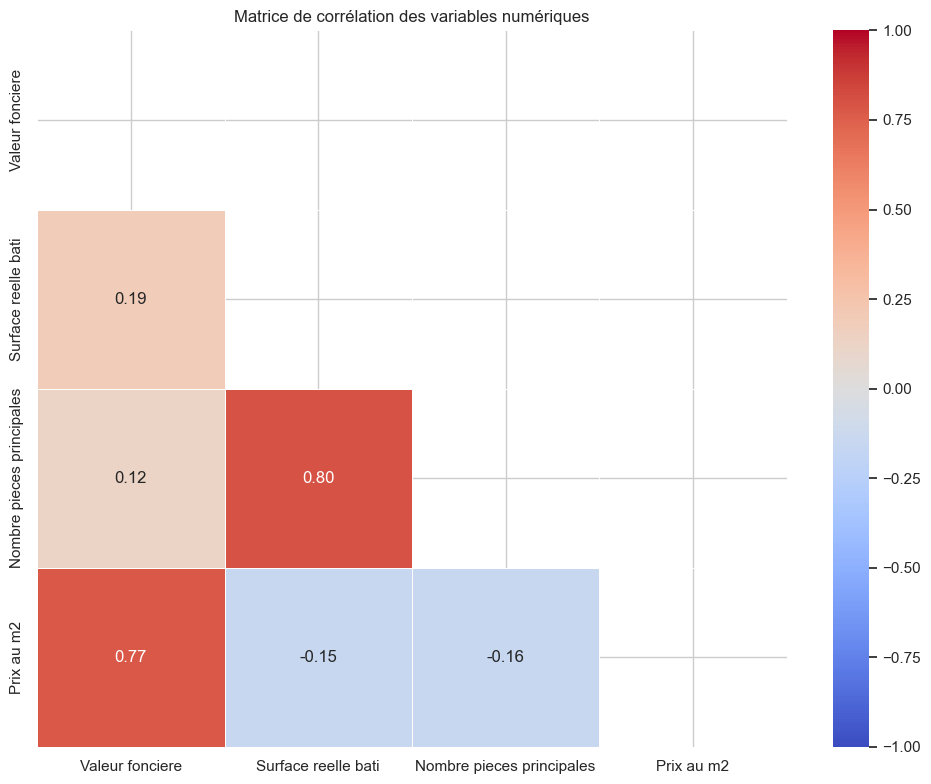

In [135]:
plt.figure(figsize=(10, 8))
corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matrice de corrélation des variables numériques')
plt.tight_layout()
plt.show()